In [36]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
# Load the dataset
uber_data = pd.read_csv('uber_data.csv')  # Replace 'your_file_path.csv' with your actual file path

In [3]:
# 1. Display first few rows to check structure and features
print(uber_data.head())

                 key  fare_amount          pickup_datetime  pickup_longitude  \
0  24238194  52:06.0          7.5  2015-05-07 19:52:06 UTC        -73.999817   
1  27835199  04:56.0          7.7  2009-07-17 20:04:56 UTC        -73.994355   
2  44984355  45:00.0         12.9  2009-08-24 21:45:00 UTC        -74.005043   
3  25894730  22:21.0          5.3  2009-06-26 08:22:21 UTC        -73.976124   
4  17610152  47:00.0         16.0  2014-08-28 17:47:00 UTC        -73.925023   

   pickup_latitude  dropoff_longitude  dropoff_latitude  passenger_count  
0        40.738354         -73.999512         40.723217                1  
1        40.728225         -73.994710         40.750325                1  
2        40.740770         -73.962565         40.772647                1  
3        40.790844         -73.965316         40.803349                3  
4        40.744085         -73.973082         40.761247                5  


In [4]:
# 2. Overview of data types and missing values
print(uber_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1498 entries, 0 to 1497
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0                      1498 non-null   int64  
 1   key                1498 non-null   object 
 2   fare_amount        1498 non-null   float64
 3   pickup_datetime    1498 non-null   object 
 4   pickup_longitude   1498 non-null   float64
 5   pickup_latitude    1498 non-null   float64
 6   dropoff_longitude  1498 non-null   float64
 7   dropoff_latitude   1498 non-null   float64
 8   passenger_count    1498 non-null   int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 105.5+ KB
None


In [5]:
# 3. Summary statistics for numerical features
print(uber_data.describe())

                     fare_amount  pickup_longitude  pickup_latitude  \
count  1.498000e+03  1498.000000       1498.000000      1498.000000   
mean   2.757595e+07    11.112510        -72.593671        39.988949   
std    1.594823e+07     9.051928         10.022304         5.520889   
min    6.250000e+02     2.500000        -74.689831         0.000000   
25%    1.380390e+07     6.000000        -73.992399        40.735149   
50%    2.745342e+07     8.500000        -73.981776        40.752228   
75%    4.117917e+07    12.500000        -73.968699        40.766078   
max    5.525106e+07    93.160000          0.001782        40.850558   

       dropoff_longitude  dropoff_latitude  passenger_count  
count        1498.000000       1498.000000      1498.000000  
mean          -72.592157         39.988252         1.660214  
std            10.022091          5.520825         1.279834  
min           -74.689831          0.000000         0.000000  
25%           -73.991519         40.732529        

In [6]:
uber_data['pickup_datetime'] = pd.to_datetime(uber_data['pickup_datetime'], errors='coerce')

In [7]:
print(uber_data.head())

                 key  fare_amount           pickup_datetime  pickup_longitude  \
0  24238194  52:06.0          7.5 2015-05-07 19:52:06+00:00        -73.999817   
1  27835199  04:56.0          7.7 2009-07-17 20:04:56+00:00        -73.994355   
2  44984355  45:00.0         12.9 2009-08-24 21:45:00+00:00        -74.005043   
3  25894730  22:21.0          5.3 2009-06-26 08:22:21+00:00        -73.976124   
4  17610152  47:00.0         16.0 2014-08-28 17:47:00+00:00        -73.925023   

   pickup_latitude  dropoff_longitude  dropoff_latitude  passenger_count  
0        40.738354         -73.999512         40.723217                1  
1        40.728225         -73.994710         40.750325                1  
2        40.740770         -73.962565         40.772647                1  
3        40.790844         -73.965316         40.803349                3  
4        40.744085         -73.973082         40.761247                5  


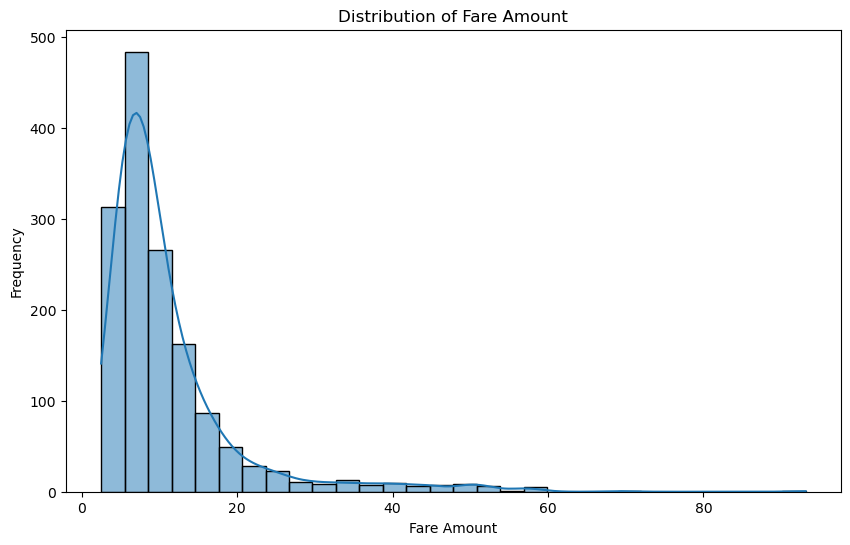

In [8]:
# 5. Exploratory Data Analysis (EDA)
# Distribution of fare amount
plt.figure(figsize=(10, 6))
sns.histplot(uber_data['fare_amount'], bins=30, kde=True)
plt.title('Distribution of Fare Amount')
plt.xlabel('Fare Amount')
plt.ylabel('Frequency')
plt.show()

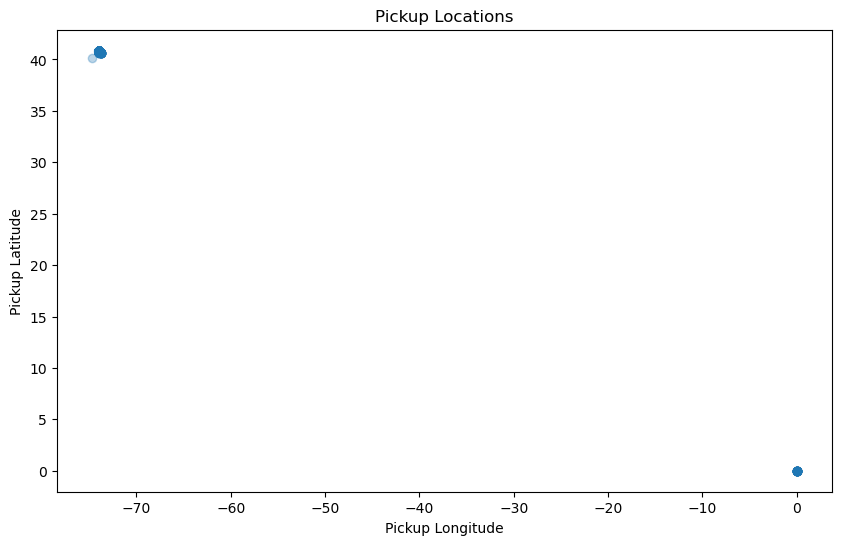

In [9]:
# Scatter plot of pickup locations to visualize concentration
plt.figure(figsize=(10, 6))
plt.scatter(uber_data['pickup_longitude'], uber_data['pickup_latitude'], alpha=0.3)
plt.title('Pickup Locations')
plt.xlabel('Pickup Longitude')
plt.ylabel('Pickup Latitude')
plt.show()

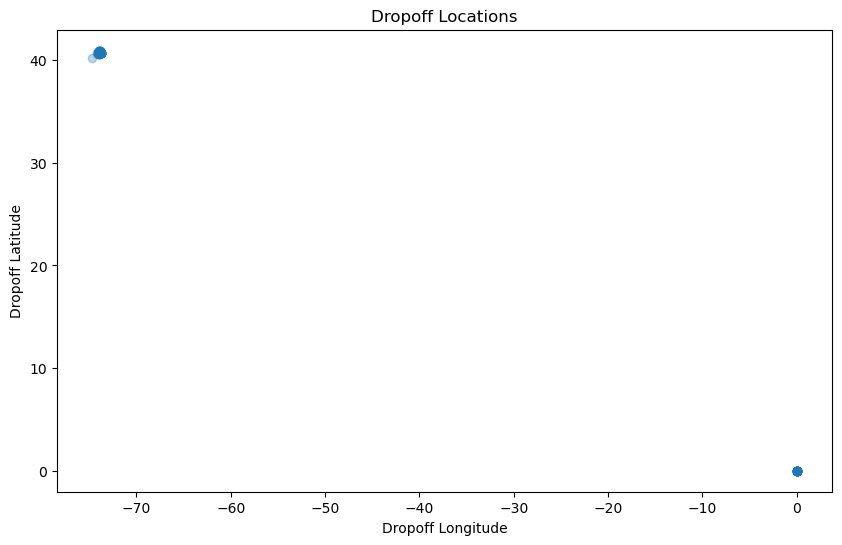

In [10]:

# Scatter plot of dropoff locations to visualize concentration
plt.figure(figsize=(10, 6))
plt.scatter(uber_data['dropoff_longitude'], uber_data['dropoff_latitude'], alpha=0.3)
plt.title('Dropoff Locations')
plt.xlabel('Dropoff Longitude')
plt.ylabel('Dropoff Latitude')
plt.show()

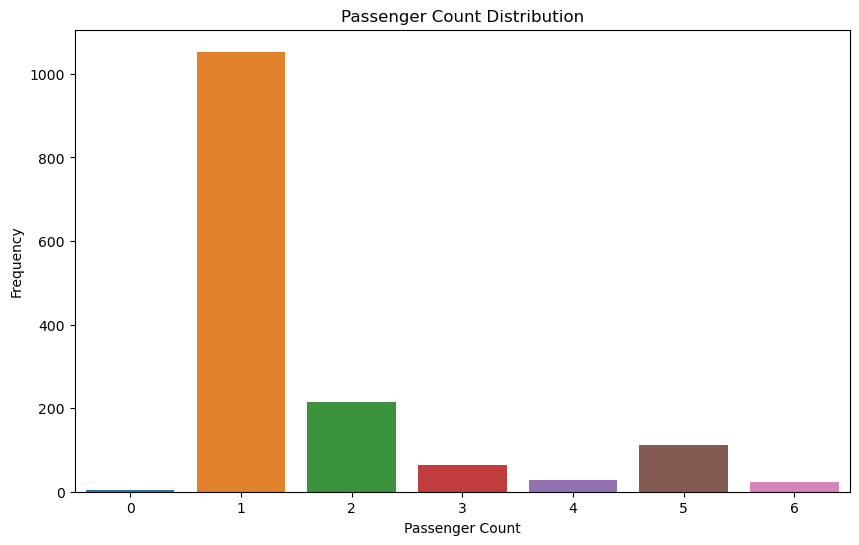

In [11]:
# Passenger count distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='passenger_count', data=uber_data)
plt.title('Passenger Count Distribution')
plt.xlabel('Passenger Count')
plt.ylabel('Frequency')
plt.show()

In [15]:
# Remove rows with outlier coordinates (0, 0) in pickup or dropoff latitude/longitude
# These are likely erroneous data points and not valid locations for Uber rides.
uber_data_cleaned = uber_data[
    (uber_data['pickup_longitude'] != 0) & 
    (uber_data['pickup_latitude'] != 0) & 
    (uber_data['dropoff_longitude'] != 0) & 
    (uber_data['dropoff_latitude'] != 0)
]

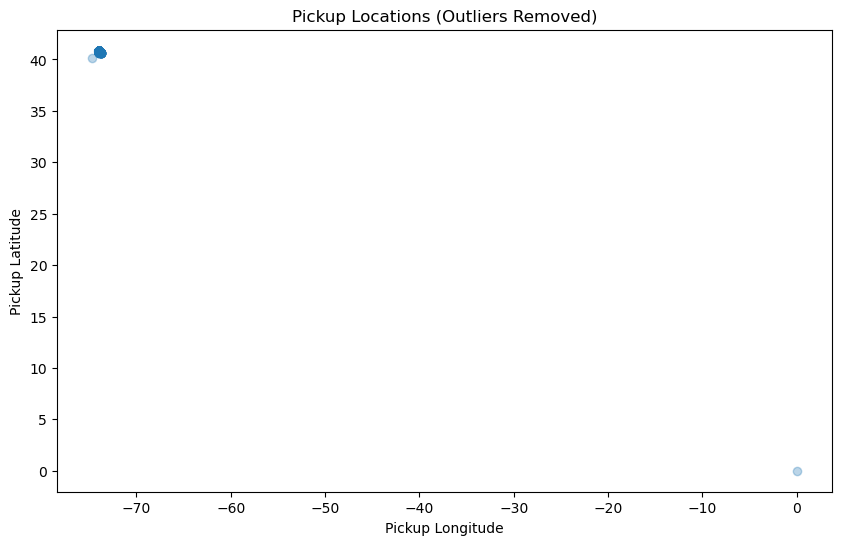

In [16]:
# Plot the cleaned data for pickup locations
plt.figure(figsize=(10, 6))
plt.scatter(uber_data_cleaned['pickup_longitude'], uber_data_cleaned['pickup_latitude'], alpha=0.3)
plt.title('Pickup Locations (Outliers Removed)')
plt.xlabel('Pickup Longitude')
plt.ylabel('Pickup Latitude')
plt.show()

In [17]:
# Re-check for rows with (0, 0) coordinates and remove them
uber_data_cleaned = uber_data[
    (uber_data['pickup_longitude'] != 0) & 
    (uber_data['pickup_latitude'] != 0) & 
    (uber_data['dropoff_longitude'] != 0) & 
    (uber_data['dropoff_latitude'] != 0)
]

In [18]:
# Print the shape of the dataset to verify the number of rows after removing outliers
print("Number of rows after removing (0,0) coordinates:", uber_data_cleaned.shape[0])


Number of rows after removing (0,0) coordinates: 1470


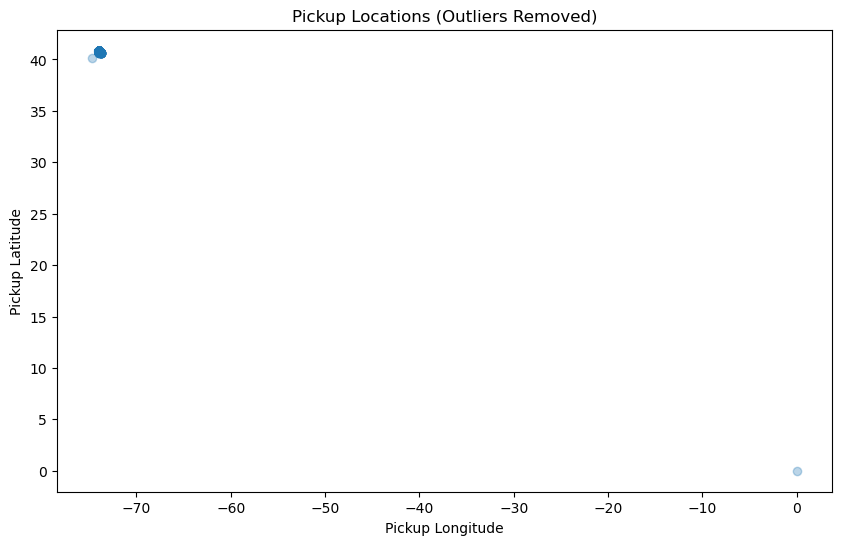

In [19]:
# Plot the cleaned data for pickup locations
plt.figure(figsize=(10, 6))
plt.scatter(uber_data_cleaned['pickup_longitude'], uber_data_cleaned['pickup_latitude'], alpha=0.3)
plt.title('Pickup Locations (Outliers Removed)')
plt.xlabel('Pickup Longitude')
plt.ylabel('Pickup Latitude')
plt.show()

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure latitude and longitude columns are numeric
uber_data['pickup_longitude'] = pd.to_numeric(uber_data['pickup_longitude'], errors='coerce')
uber_data['pickup_latitude'] = pd.to_numeric(uber_data['pickup_latitude'], errors='coerce')
uber_data['dropoff_longitude'] = pd.to_numeric(uber_data['dropoff_longitude'], errors='coerce')
uber_data['dropoff_latitude'] = pd.to_numeric(uber_data['dropoff_latitude'], errors='coerce')

In [21]:
# Remove rows with any 0 coordinates for pickup and dropoff locations
uber_data_cleaned = uber_data[
    (uber_data['pickup_longitude'] != 0) & 
    (uber_data['pickup_latitude'] != 0) & 
    (uber_data['dropoff_longitude'] != 0) & 
    (uber_data['dropoff_latitude'] != 0)
]

Number of rows after removing (0,0) coordinates: 1470


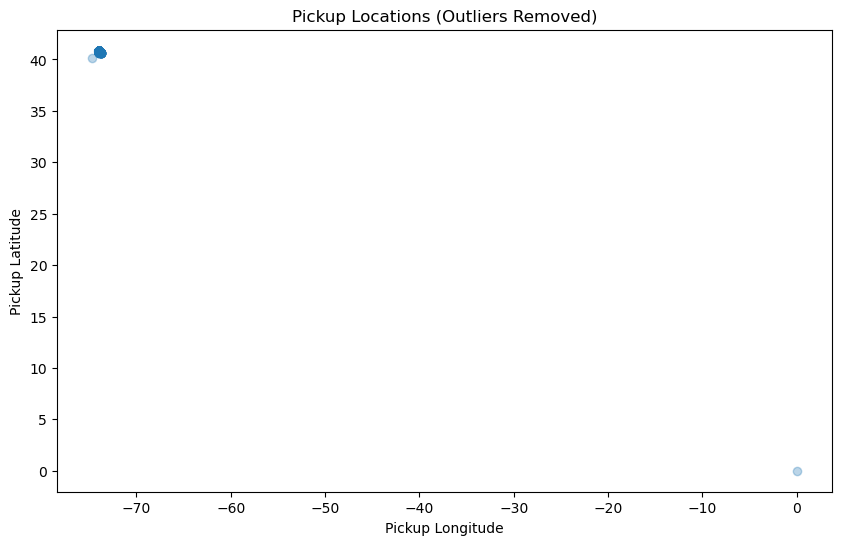

In [22]:
print("Number of rows after removing (0,0) coordinates:", uber_data_cleaned.shape[0])

# Plot the cleaned data for pickup locations
plt.figure(figsize=(10, 6))
plt.scatter(uber_data_cleaned['pickup_longitude'], uber_data_cleaned['pickup_latitude'], alpha=0.3)
plt.title('Pickup Locations (Outliers Removed)')
plt.xlabel('Pickup Longitude')
plt.ylabel('Pickup Latitude')
plt.show()

In [23]:
# Step 1: Identify out-of-range coordinates for New York City
out_of_range = uber_data[
    (uber_data['pickup_longitude'] < -74.3) | (uber_data['pickup_longitude'] > -73.5) |
    (uber_data['pickup_latitude'] < 40.5) | (uber_data['pickup_latitude'] > 41) |
    (uber_data['dropoff_longitude'] < -74.3) | (uber_data['dropoff_longitude'] > -73.5) |
    (uber_data['dropoff_latitude'] < 40.5) | (uber_data['dropoff_latitude'] > 41)
]


In [24]:
print("Number of rows with out-of-range coordinates:", out_of_range.shape[0])

# Display a sample of rows with out-of-range coordinates for inspection
print("Sample of out-of-range coordinates:")
print(out_of_range.head())

Number of rows with out-of-range coordinates: 30
Sample of out-of-range coordinates:
                   key  fare_amount           pickup_datetime  \
7    44195482  52:00.0          2.5 2012-12-11 13:52:00+00:00   
11    6379048  15:00.0          8.5 2011-05-23 22:15:00+00:00   
65   21993993  27:00.0          6.0 2014-05-05 19:27:00+00:00   
92    1454546  07:00.0          6.1 2011-12-02 14:07:00+00:00   
120  17358122  39:48.0          6.5 2010-08-20 19:39:48+00:00   

     pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
7                 0.0              0.0                0.0               0.0   
11                0.0              0.0                0.0               0.0   
65                0.0              0.0                0.0               0.0   
92                0.0              0.0                0.0               0.0   
120               0.0              0.0                0.0               0.0   

     passenger_count  
7                  1  
11 

In [25]:
# Step 2: Check for missing values in coordinates
missing_coords = uber_data[
    uber_data['pickup_longitude'].isna() | uber_data['pickup_latitude'].isna() |
    uber_data['dropoff_longitude'].isna() | uber_data['dropoff_latitude'].isna()
]

print("Number of rows with missing coordinate values:", missing_coords.shape[0])


Number of rows with missing coordinate values: 0


In [26]:
# Step 3: Summarize unique values to spot any repeated erroneous coordinates
unique_pickup_longitudes = uber_data['pickup_longitude'].value_counts()
unique_pickup_latitudes = uber_data['pickup_latitude'].value_counts()
unique_dropoff_longitudes = uber_data['dropoff_longitude'].value_counts()
unique_dropoff_latitudes = uber_data['dropoff_latitude'].value_counts()


In [27]:
print("Most common pickup longitudes:")
print(unique_pickup_longitudes.head())

print("Most common pickup latitudes:")
print(unique_pickup_latitudes.head())

print("Most common dropoff longitudes:")
print(unique_dropoff_longitudes.head())

print("Most common dropoff latitudes:")
print(unique_dropoff_latitudes.head())

Most common pickup longitudes:
pickup_longitude
 0.000000     27
-73.993640     3
-73.957828     2
-73.969720     2
-73.971075     2
Name: count, dtype: int64
Most common pickup latitudes:
pickup_latitude
0.000000     27
40.781593     2
40.770792     2
40.763656     2
40.767317     2
Name: count, dtype: int64
Most common dropoff longitudes:
dropoff_longitude
 0.000000     27
-73.979082     2
-73.990077     2
-73.983632     2
-73.977412     2
Name: count, dtype: int64
Most common dropoff latitudes:
dropoff_latitude
0.000000     27
40.766030     2
40.750142     2
40.725255     2
40.768595     2
Name: count, dtype: int64


In [28]:
# Remove rows with any (0,0) coordinates in either pickup or dropoff locations
uber_data_cleaned = uber_data[
    (uber_data['pickup_longitude'] != 0) | 
    (uber_data['pickup_latitude'] != 0) | 
    (uber_data['dropoff_longitude'] != 0) | 
    (uber_data['dropoff_latitude'] != 0)
]

# Verify that all (0,0) coordinates are removed by checking the counts again
print("Number of rows after removing all (0,0) coordinates:", uber_data_cleaned.shape[0])

# Re-check for any (0,0) coordinates remaining
zero_coords_check = uber_data_cleaned[
    (uber_data_cleaned['pickup_longitude'] == 0) & 
    (uber_data_cleaned['pickup_latitude'] == 0) & 
    (uber_data_cleaned['dropoff_longitude'] == 0) & 
    (uber_data_cleaned['dropoff_latitude'] == 0)
]

print("Number of rows with (0,0) coordinates after filtering:", zero_coords_check.shape[0])


Number of rows after removing all (0,0) coordinates: 1472
Number of rows with (0,0) coordinates after filtering: 0


In [29]:

print("Most common pickup longitudes:")
print(unique_pickup_longitudes.head())

print("Most common pickup latitudes:")
print(unique_pickup_latitudes.head())

print("Most common dropoff longitudes:")
print(unique_dropoff_longitudes.head())

print("Most common dropoff latitudes:")
print(unique_dropoff_latitudes.head())

Most common pickup longitudes:
pickup_longitude
 0.000000     27
-73.993640     3
-73.957828     2
-73.969720     2
-73.971075     2
Name: count, dtype: int64
Most common pickup latitudes:
pickup_latitude
0.000000     27
40.781593     2
40.770792     2
40.763656     2
40.767317     2
Name: count, dtype: int64
Most common dropoff longitudes:
dropoff_longitude
 0.000000     27
-73.979082     2
-73.990077     2
-73.983632     2
-73.977412     2
Name: count, dtype: int64
Most common dropoff latitudes:
dropoff_latitude
0.000000     27
40.766030     2
40.750142     2
40.725255     2
40.768595     2
Name: count, dtype: int64


In [30]:
print(uber_data.columns)

Index([' ', 'key', 'fare_amount', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count'],
      dtype='object')


In [32]:
import numpy as np
import pandas as pd
from datetime import datetime

In [33]:
# Assuming you have already loaded your data into the DataFrame `uber_data`

# Step 1: Convert `pickup_datetime` to datetime format
uber_data['pickup_datetime'] = pd.to_datetime(uber_data['pickup_datetime'], errors='coerce')

# Step 2: Extract time-based features
# Extract the hour of the day
uber_data['pickup_hour'] = uber_data['pickup_datetime'].dt.hour

# Extract the day of the week
uber_data['pickup_day_of_week'] = uber_data['pickup_datetime'].dt.dayofweek  # Monday=0, Sunday=6

# Define function for part of the day
def get_part_of_day(hour):
    if 5 <= hour < 12:
        return 'morning'
    elif 12 <= hour < 17:
        return 'afternoon'
    elif 17 <= hour < 21:
        return 'evening'
    else:
        return 'night'

# Apply function to categorize into parts of day
uber_data['part_of_day'] = uber_data['pickup_hour'].apply(get_part_of_day)

# Step 3: Calculate the Haversine distance between pickup and dropoff points
def haversine(lat1, lon1, lat2, lon2):
    # Convert decimal degrees to radians
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    # Haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    r = 6371  # Radius of Earth in kilometers
    return c * r

# Apply Haversine function to calculate distance
uber_data['distance_km'] = uber_data.apply(lambda row: haversine(row['pickup_latitude'], row['pickup_longitude'],
                                                                row['dropoff_latitude'], row['dropoff_longitude']), axis=1)



In [34]:
# Step 4: Categorize distance into short, medium, and long
def categorize_distance(distance):
    if distance < 2:
        return 'short'
    elif 2 <= distance < 10:
        return 'medium'
    else:
        return 'long'

uber_data['distance_category'] = uber_data['distance_km'].apply(categorize_distance)

# Step 5: Create passenger count category
def passenger_count_category(passenger_count):
    if passenger_count == 1:
        return 'single'
    elif 2 <= passenger_count <= 4:
        return 'group'
    else:
        return 'large_group'

uber_data['passenger_count_category'] = uber_data['passenger_count'].apply(passenger_count_category)

# Display the first few rows to verify the new features
print(uber_data.head())

                 key  fare_amount           pickup_datetime  pickup_longitude  \
0  24238194  52:06.0          7.5 2015-05-07 19:52:06+00:00        -73.999817   
1  27835199  04:56.0          7.7 2009-07-17 20:04:56+00:00        -73.994355   
2  44984355  45:00.0         12.9 2009-08-24 21:45:00+00:00        -74.005043   
3  25894730  22:21.0          5.3 2009-06-26 08:22:21+00:00        -73.976124   
4  17610152  47:00.0         16.0 2014-08-28 17:47:00+00:00        -73.925023   

   pickup_latitude  dropoff_longitude  dropoff_latitude  passenger_count  \
0        40.738354         -73.999512         40.723217                1   
1        40.728225         -73.994710         40.750325                1   
2        40.740770         -73.962565         40.772647                1   
3        40.790844         -73.965316         40.803349                3   
4        40.744085         -73.973082         40.761247                5   

   pickup_hour  pickup_day_of_week part_of_day  distance

In [35]:


# Assuming 'uber_data' is the DataFrame and 'fare_amount' is the target variable
# X represents the features, while y represents the target (fare_amount)

# Define feature matrix X and target vector y
X = uber_data.drop(columns=['fare_amount', 'key', 'pickup_datetime'])  
# Drop non-feature columns
y = uber_data['fare_amount']

# Split the dataset into training and testing sets (e.g., 80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the number of samples in each set to verify the split
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

Training set size: 1198 samples
Testing set size: 300 samples


Correlation of features with fare_amount:
fare_amount                             1.000000
distance_category_medium                0.180964
distance_km                             0.100783
pickup_day_of_week_6                    0.063251
                                        0.032383
passenger_count_category_single         0.030441
part_of_day_night                       0.029491
pickup_day_of_week_2                    0.028262
pickup_latitude                         0.021480
pickup_hour                             0.017959
pickup_day_of_week_4                    0.009825
dropoff_latitude                        0.001288
pickup_day_of_week_1                    0.000185
dropoff_longitude                      -0.001302
part_of_day_evening                    -0.005322
part_of_day_morning                    -0.015652
pickup_longitude                       -0.020754
pickup_day_of_week_5                   -0.026157
passenger_count_category_large_group   -0.029011
passenger_count            

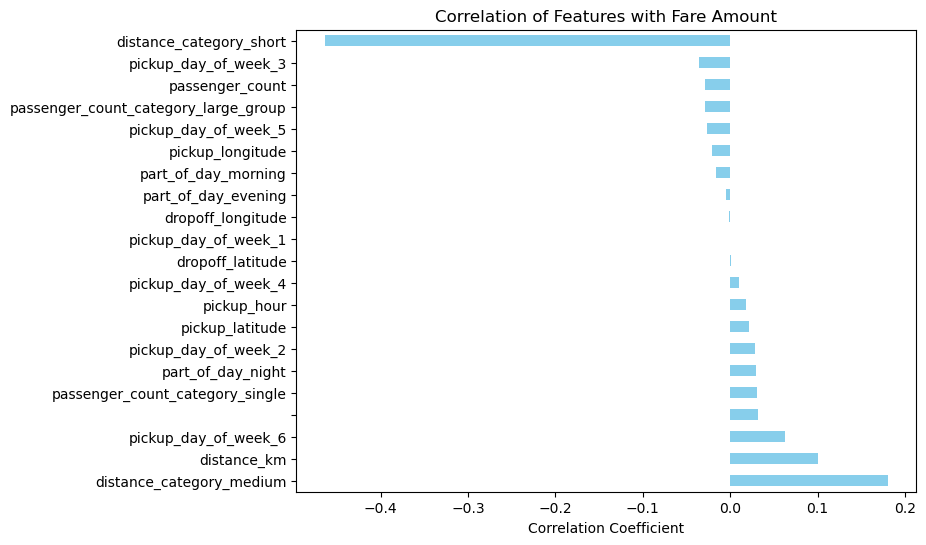

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'uber_data' is the DataFrame with categorical features

# Step 1: Identify all categorical columns that need encoding
# If you have other categorical columns, add them here
categorical_columns = ['part_of_day', 'pickup_day_of_week', 'distance_category', 'passenger_count_category']

# Step 2: Apply one-hot encoding to the categorical columns
uber_data_encoded = pd.get_dummies(uber_data, columns=categorical_columns, drop_first=True)

# Define the feature matrix X and target variable y again after encoding
X = uber_data_encoded.drop(columns=['fare_amount', 'key', 'pickup_datetime'])  # Drop non-feature columns
y = uber_data_encoded['fare_amount']

# Step 3: Re-run correlation analysis
# Combine features and target for correlation analysis
data_for_corr = X.copy()
data_for_corr['fare_amount'] = y

# Calculate the correlation matrix
correlation_matrix = data_for_corr.corr()

# Extract correlations with the target variable
target_correlation = correlation_matrix['fare_amount'].sort_values(ascending=False)

# Display the correlation values
print("Correlation of features with fare_amount:")
print(target_correlation)

# Visualize correlation with a bar plot for the target variable only
plt.figure(figsize=(8, 6))
target_correlation.drop('fare_amount').plot(kind='barh', color='skyblue')
plt.title("Correlation of Features with Fare Amount")
plt.xlabel("Correlation Coefficient")
plt.show()





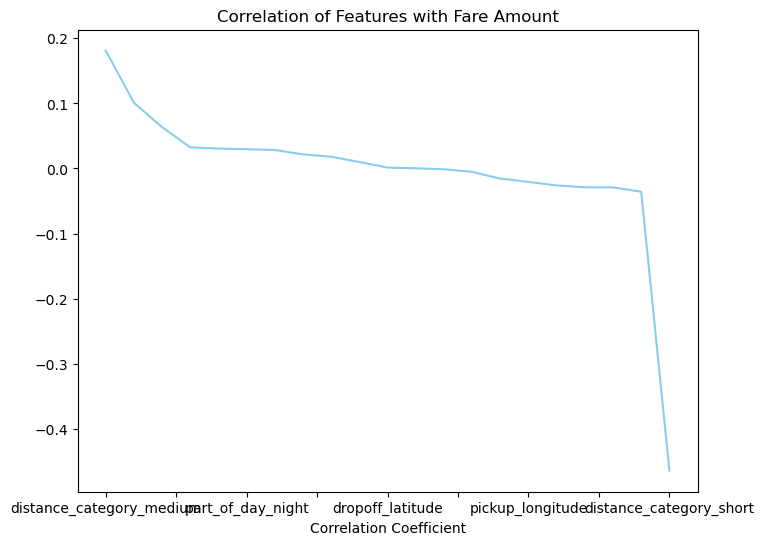

In [40]:
# Visualize correlation with a bar plot for the target variable only
plt.figure(figsize=(8, 6))
target_correlation.drop('fare_amount').plot(color='skyblue')
plt.title("Correlation of Features with Fare Amount")
plt.xlabel("Correlation Coefficient")
plt.show()

In [41]:
import numpy as np
import pandas as pd

# Step 1: Calculate the correlation matrix
correlation_matrix = X.corr()

In [42]:
# Step 2: Set a correlation threshold (e.g., 0.8)
threshold = 0.8

In [43]:
# Step 3: Find the pairs of features that have a correlation greater than the threshold
# Create a mask to ignore the diagonal (self-correlations)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

In [44]:
print(mask)

[[ True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True]
 [False  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True]
 [False False  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True]
 [False False False  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True]
 [False False False False  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True]
 [False False False False False  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True]
 [False False False False False False  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True]
 [False False False False False False False  True  True  True  True  True
   True  

In [45]:
# Step 4: Identify features that are highly correlated
high_corr_pairs = [(column, row) for column in correlation_matrix.columns for row in correlation_matrix.index 
                   if abs(correlation_matrix.loc[column, row]) > threshold and column != row]


In [46]:
# Display the highly correlated pairs
print("Highly correlated feature pairs:")
print(high_corr_pairs)

Highly correlated feature pairs:
[('pickup_longitude', 'pickup_latitude'), ('pickup_longitude', 'dropoff_longitude'), ('pickup_longitude', 'dropoff_latitude'), ('pickup_latitude', 'pickup_longitude'), ('pickup_latitude', 'dropoff_longitude'), ('pickup_latitude', 'dropoff_latitude'), ('dropoff_longitude', 'pickup_longitude'), ('dropoff_longitude', 'pickup_latitude'), ('dropoff_longitude', 'dropoff_latitude'), ('dropoff_latitude', 'pickup_longitude'), ('dropoff_latitude', 'pickup_latitude'), ('dropoff_latitude', 'dropoff_longitude'), ('passenger_count', 'passenger_count_category_large_group'), ('distance_category_medium', 'distance_category_short'), ('distance_category_short', 'distance_category_medium'), ('passenger_count_category_large_group', 'passenger_count')]


In [47]:
# Step 5: Drop one feature from each pair of highly correlated features
# You can use a set to store the features to be removed
to_drop = set()
for column, row in high_corr_pairs:
    to_drop.add(row)

In [48]:
# Drop the identified features
X_cleaned = X.drop(columns=to_drop)

In [49]:
# Display the remaining features
print("Remaining features after removing highly correlated ones:")
print(X_cleaned.columns)


Remaining features after removing highly correlated ones:
Index([' ', 'pickup_hour', 'distance_km', 'part_of_day_evening',
       'part_of_day_morning', 'part_of_day_night', 'pickup_day_of_week_1',
       'pickup_day_of_week_2', 'pickup_day_of_week_3', 'pickup_day_of_week_4',
       'pickup_day_of_week_5', 'pickup_day_of_week_6',
       'passenger_count_category_single'],
      dtype='object')
